## Distribuição de grau no modelo Barabási-Albert

### Neste trabalho, você deve analisar a evolução dos graus dos vértices, individualmente e como distribuição, de uma rede produzida segundo o modelo Barabási-Albert (BA).
### Utilizando o networkx ou o graph-tool, gere um grafo BA com 10,000 vértices, com m = 4, e utilizando como grafo inicial uma clique de 4 vértices. A partir desta rede, faça as seguintes análises:
- Plote a distribuição de grau (na forma cumulativa complementar) para os grafos intermediários com N = 100, 1K e 10K vértices. E A distribuição "converge" para uma forma específica?
- Identifique quem são os vértices com os 20 maiores graus, para estes três grafos intermediários. Eles são sempre os mesmos, na mesma ordem? Como a razão entre o maior grau e os graus dos outros 19 destes vértices muda em função de N?
#### **Questão importante:** *para fazer essas análises, como fazer para "interromper" o crescimento do modelo BA em certos tamanhos conhecidos? Veja a documentação do networkx e do graph-tool e use a biblioteca de forma criativa =D*

### Importando dependências

In [46]:
import networkx as nx
import matplotlib.pyplot as plot
import numpy as np

### Definindo funções modulares

In [47]:
def get_grafo_inicial() -> nx.Graph:
    return nx.complete_graph(4)

def get_grafo_barabasi(n, m, G_inicial) -> nx.Graph:
    return nx.barabasi_albert_graph(n, m, initial_graph=G_inicial)

def get_top_k_nodes(G, k):
    return sorted(G.degree(), key=lambda x: x[1], reverse=True)[:k]


### Gerando grafo BA para n = 100, 1K e 10K

In [48]:
# Parâmetros
m = 4
G0 = get_grafo_inicial()
labels = ['N=100', 'N=1K', 'N=10K']
grafos = {'N=100': get_grafo_barabasi(100, m, G0), 'N=1K': get_grafo_barabasi(1000, m, G0), 'N=10K':  get_grafo_barabasi(10000, m, G0)}

print("Grafos gerados:")
for key in labels:
    print(f"{key}: {grafos[key].number_of_nodes()} nós, {grafos[key].number_of_edges()} arestas")


Grafos gerados:
N=100: 100 nós, 390 arestas
N=1K: 1000 nós, 3990 arestas
N=10K: 10000 nós, 39990 arestas


### Obtendo CCDF dos grafos

In [49]:
graus ={'N=100': [], 'N=1K': [], 'N=10K': []}
for key in labels:
    graus[key] = [d for _, d in grafos[key].degree()]
    graus[key].sort()
    #graus[key] = np.array(graus[key])

CCDFs = {'N=100': [], 'N=1K': [], 'N=10K': []}
for key in labels:
    CCDFs[key] = [1 - (i/len(graus[key])) for i in range(len(graus[key]))]


### Gerando os plots


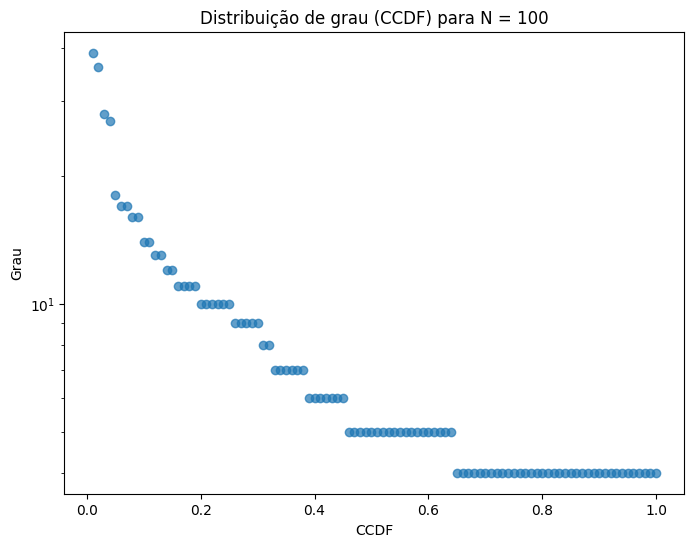

In [50]:
plot.figure(figsize=(8,6))
plot.scatter(CCDFs['N=100'], graus['N=100'], alpha=0.7)
plot.xlabel("CCDF")
plot.ylabel("Grau")
plot.yscale('log')
plot.title("Distribuição de grau (CCDF) para N = 100")
plot.show()

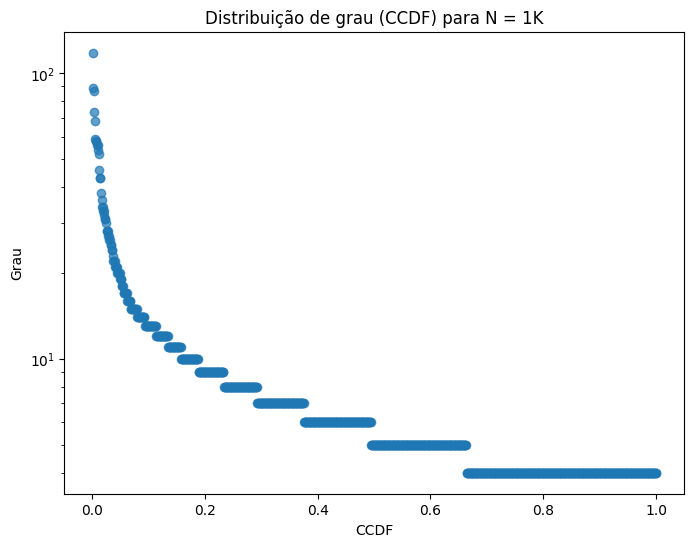

In [51]:
plot.figure(figsize=(8,6))
plot.scatter(CCDFs['N=1K'], graus['N=1K'], alpha=0.7)
plot.xlabel("CCDF")
plot.ylabel("Grau")
plot.yscale('log')
plot.title("Distribuição de grau (CCDF) para N = 1K")
plot.show()

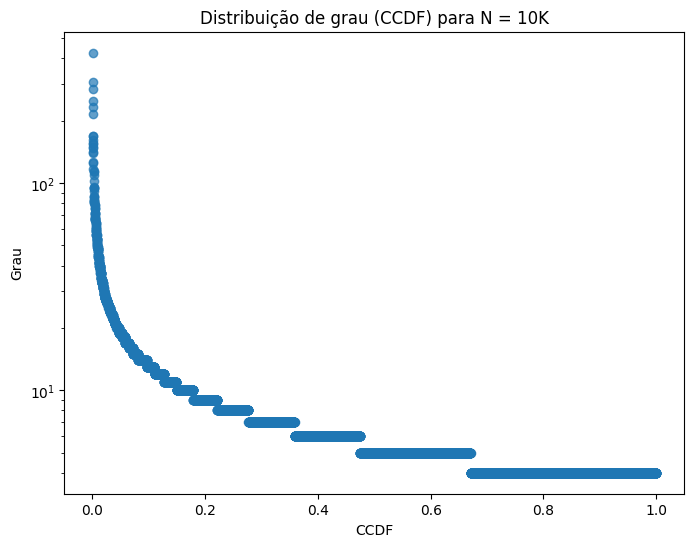

In [52]:
plot.figure(figsize=(8,6))
plot.scatter(CCDFs['N=10K'], graus['N=10K'], alpha=0.7)
plot.xlabel("CCDF")
plot.ylabel("Grau")
plot.yscale('log')
plot.title("Distribuição de grau (CCDF) para N = 10K")
plot.show()

**Analisando:**
Observa-se que, independente do tamanho de nós, quando plotamos a distribuição cumulativa complementar (CCDF) dos graus dos vértices em escala logarítmica no eixo Y, a distribuição tende a seguir uma linha reta. Isso indica que a distribuição de graus segue uma lei de potência, característica típica de redes geradas pelo modelo Barabási-Albert.
Quando a quantidade de nós aumenta, a distribuição vai se configurando de maneira mais "linear", mas a forma geral da distribuição permanece consistente.

### Identificando os vértices com os 20 maiores graus, para estes três grafos

In [53]:
top_num = 20
tops = {label: get_top_k_nodes(grafos[label], top_num) for label in list(grafos.keys())}

# imprime top20 para cada N
for label in labels:
    print(f"\n{label} - Top 20 [nó => grau]:")
    for i, (node, deg) in enumerate(tops[label], 1):
        print(f"{i:2d}. [{node} => {deg}]")




N=100 - Top 20 [nó => grau]:
 1. [0 => 39]
 2. [2 => 36]
 3. [1 => 28]
 4. [5 => 27]
 5. [4 => 18]
 6. [10 => 17]
 7. [20 => 17]
 8. [7 => 16]
 9. [9 => 16]
10. [3 => 14]
11. [6 => 14]
12. [15 => 13]
13. [18 => 13]
14. [11 => 12]
15. [30 => 12]
16. [12 => 11]
17. [22 => 11]
18. [24 => 11]
19. [28 => 11]
20. [8 => 10]

N=1K - Top 20 [nó => grau]:
 1. [3 => 118]
 2. [4 => 89]
 3. [6 => 87]
 4. [0 => 73]
 5. [1 => 68]
 6. [28 => 59]
 7. [8 => 58]
 8. [10 => 58]
 9. [2 => 56]
10. [12 => 56]
11. [11 => 54]
12. [21 => 52]
13. [33 => 46]
14. [15 => 43]
15. [18 => 43]
16. [38 => 38]
17. [17 => 36]
18. [26 => 34]
19. [71 => 34]
20. [5 => 33]

N=10K - Top 20 [nó => grau]:
 1. [4 => 426]
 2. [0 => 306]
 3. [8 => 286]
 4. [9 => 248]
 5. [6 => 232]
 6. [1 => 216]
 7. [2 => 169]
 8. [14 => 169]
 9. [3 => 162]
10. [11 => 157]
11. [12 => 155]
12. [16 => 150]
13. [30 => 147]
14. [26 => 142]
15. [29 => 140]
16. [20 => 127]
17. [21 => 125]
18. [10 => 117]
19. [13 => 114]
20. [50 => 113]


In [57]:
# Realizando a comparação entre os tops
for a in range(len(labels)):
    for b in range(a+1, len(labels)):
        A, B = labels[a], labels[b]
        nodes_A = [n for n, _ in tops[A]]
        nodes_B = [n for n, _ in tops[B]]

        set_A = set(nodes_A)
        set_B = set(nodes_B)
        inter = set_A & set_B
        union = set_A | set_B

        set_pct = len(inter) / top_num * 100

        order_matches = sum(1 for i in range(top_num) if nodes_A[i] == nodes_B[i])
        order_pct = order_matches / top_num * 100

        print(f"\nComparação {A} vs {B}:")
        print(f"- itens em comum: {len(inter)} / {top_num} => {set_pct:.2f}%")
        print(f"- mesmas posições (ordem): {order_matches} / {top_num} => {order_pct:.2f}%")
        if len(inter) > 0:
            print(f"- itens em comum: {sorted(inter)}")


Comparação N=100 vs N=1K:
- itens em comum: 14 / 20 => 70.00%
- mesmas posições (ordem): 0 / 20 => 0.00%
- itens em comum: [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 15, 18, 28]

Comparação N=100 vs N=10K:
- itens em comum: 13 / 20 => 65.00%
- mesmas posições (ordem): 0 / 20 => 0.00%
- itens em comum: [0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 12, 20, 30]

Comparação N=1K vs N=10K:
- itens em comum: 12 / 20 => 60.00%
- mesmas posições (ordem): 0 / 20 => 0.00%
- itens em comum: [0, 1, 2, 3, 4, 6, 8, 10, 11, 12, 21, 26]


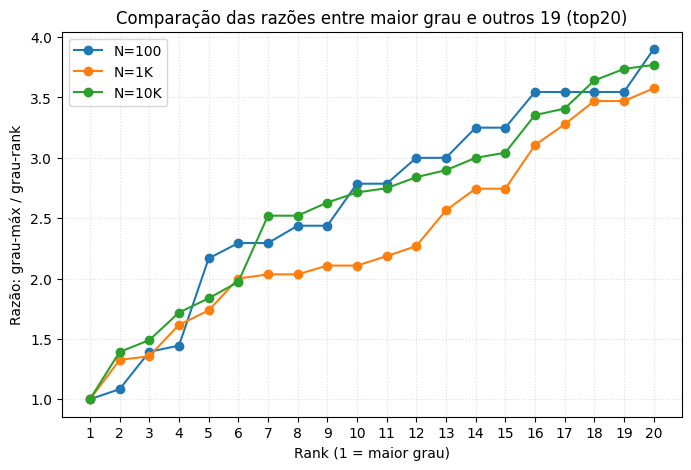

In [58]:
# Calculando razões max_deg / deg para top20 e plotando
plot.figure(figsize=(8,5))
for label in labels:
    degs = [deg for _, deg in tops[label]]
    max_deg = degs[0]
    ratios = [max_deg / d if d>0 else np.inf for d in degs]
    plot.plot(range(1,21), ratios, marker='o', label=label)

plot.xlabel("Rank (1 = maior grau)")
plot.ylabel("Razão: grau-máx / grau-rank")
plot.title("Comparação das razões entre maior grau e outros 19 (top20)")
plot.xticks(range(1,21))
plot.grid(which='both', linestyle=':', alpha=0.4)
plot.legend()
plot.show()

**Analisando:**
Em relação ao "top 20" de vértices com maiores graus, observa-se interseção alta entre os conjuntos experimentados, mas não há igualdade total. Isso indica que, embora alguns vértices de alto grau permaneçam consistentes à medida que a rede cresce, outros vértices novos podem emergir como hubs devido ao processo de crescimento preferencial do modelo Barabási-Albert.

Em relação a comparação da razão do maior grau em relação aos outros 19, uma razão menor significa que a diferença entre o grau do vértice de maior grau (o "campeão") e os graus dos outros vértices do top-20 é relativamente menor. No grafo BA analisado com N=10K, os 20 vértices mais importantes têm graus mais "próximos" entre si, que, em comparação com o grafo BA N=100, há disparidade evidente entre o primeiro e os demais. Isso sugere que, à medida que a rede cresce, a "competição" entre os vértices de alto grau se intensifica, levando a uma distribuição de graus mais equilibrada entre os principais hubs da rede.